In [2]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from glob import glob
import pandas as pd
from copy import deepcopy
from hydra import initialize, compose
import itertools
from matplotlib.ticker import MaxNLocator

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):  # ../../
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.utils import util

In [3]:
# combine CSVs from each run into one CSV
roman_data_dir = config.machine.dir_00
roman_total_csv = os.path.join(roman_data_dir, 'total_pop.csv')
roman_detectable_csv = os.path.join(roman_data_dir, 'detectable_pop.csv')
util.delete_if_exists(roman_total_csv)
util.delete_if_exists(roman_detectable_csv)
roman_total_df = util.combine_all_csvs(roman_data_dir, 'total', roman_total_csv)
roman_detectable_df = util.combine_all_csvs(roman_data_dir, 'detectable', roman_detectable_csv)

Wrote combined CSV to /data/bwedig/mejiro/pipeline/00/total_pop.csv
Wrote combined CSV to /data/bwedig/mejiro/pipeline/00/detectable_pop.csv


In [4]:
# combine CSVs from each run into one CSV
hwo_data_dir = os.path.join(config.machine.data_dir, 'hwo')
hwo_total_csv = os.path.join(hwo_data_dir, 'total_pop.csv')
hwo_detectable_csv = os.path.join(hwo_data_dir, 'detectable_pop.csv')
util.delete_if_exists(hwo_total_csv)
util.delete_if_exists(hwo_detectable_csv)
hwo_total_df = util.combine_all_csvs(hwo_data_dir, 'total', hwo_total_csv)
hwo_detectable_df = util.combine_all_csvs(hwo_data_dir, 'detectable', hwo_detectable_csv)

Wrote combined CSV to /data/bwedig/mejiro/hwo/total_pop.csv
Wrote combined CSV to /data/bwedig/mejiro/hwo/detectable_pop.csv


select histograms to show

In [5]:
roman_velocity_dispersions = roman_detectable_df.loc[:,'velodisp']
roman_masses = roman_detectable_df.loc[:,'massstel'] * 1e12
roman_source_redshifts = roman_detectable_df.loc[:,'redssour']
roman_lens_redshifts = roman_detectable_df.loc[:,'redslens']
roman_einstein_radii = roman_detectable_df.loc[:,'angleins']
roman_num_images = roman_detectable_df.loc[:,'numbimag']
roman_source_magnitudes = roman_detectable_df.loc[:,'magtsourF106']
roman_lens_magnitudes = roman_detectable_df.loc[:,'magtlensF106']

roman_total_velocity_dispersions = roman_total_df.loc[:,'velodisp']
roman_total_masses = roman_total_df.loc[:,'massstel'] * 1e12
roman_total_source_redshifts = roman_total_df.loc[:,'redssour']
roman_total_lens_redshifts = roman_total_df.loc[:,'redslens']
roman_total_einstein_radii = roman_total_df.loc[:,'angleins']
roman_total_num_images = roman_total_df.loc[:,'numbimag']
roman_total_source_magnitudes = roman_total_df.loc[:,'magtsourF106']
roman_total_lens_magnitudes = roman_total_df.loc[:,'magtlensF106']

In [6]:
hwo_velocity_dispersions = hwo_detectable_df.loc[:,'velodisp']
hwo_masses = hwo_detectable_df.loc[:,'massstel'] * 1e12
hwo_source_redshifts = hwo_detectable_df.loc[:,'redssour']
hwo_lens_redshifts = hwo_detectable_df.loc[:,'redslens']
hwo_einstein_radii = hwo_detectable_df.loc[:,'angleins']
hwo_num_images = hwo_detectable_df.loc[:,'numbimag']
hwo_source_magnitudes = hwo_detectable_df.loc[:,'magtsourhdi']
hwo_lens_magnitudes = hwo_detectable_df.loc[:,'magtlenshdi']

hwo_total_velocity_dispersions = hwo_total_df.loc[:,'velodisp']
hwo_total_masses = hwo_total_df.loc[:,'massstel'] * 1e12
hwo_total_source_redshifts = hwo_total_df.loc[:,'redssour']
hwo_total_lens_redshifts = hwo_total_df.loc[:,'redslens']
hwo_total_einstein_radii = hwo_total_df.loc[:,'angleins']
hwo_total_num_images = hwo_total_df.loc[:,'numbimag']
hwo_total_source_magnitudes = hwo_total_df.loc[:,'magtsourhdi']
hwo_total_lens_magnitudes = hwo_total_df.loc[:,'magtlenshdi']

In [7]:
print(f'Roman total: {len(roman_total_df)}')
print(f'Roman detectable: {len(roman_detectable_df)}')
print(f'HWO total: {len(hwo_total_df)}')
print(f'HWO detectable: {len(hwo_detectable_df)}')

Roman total: 626762
Roman detectable: 627543
HWO total: 561155
HWO detectable: 558888


In [8]:
roman_snr_files = glob(f'{roman_data_dir}/snr_list_*.npy')
roman_snr_list = list(itertools.chain.from_iterable([np.load(f) for f in roman_snr_files]))

hwo_snr_files = glob(f'{hwo_data_dir}/snr_list_*.npy')
hwo_snr_list = list(itertools.chain.from_iterable([np.load(f) for f in hwo_snr_files]))

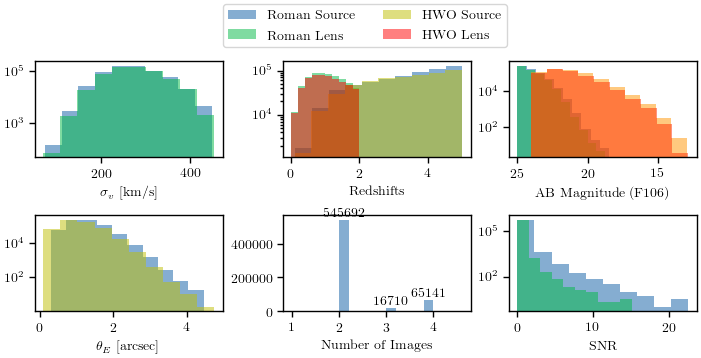

In [9]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(7, 3), constrained_layout=True)
# bins = 10

ax[0][0].hist(roman_velocity_dispersions, label='Roman Detectable', alpha=0.5)
ax[0][0].hist(hwo_velocity_dispersions, label='HWO Detectable', alpha=0.5)
# ax[0][0].hist(roman_total_velocity_dispersions, label='Roman Total', histtype='step', color='purple')
# ax[0][0].hist(hwo_total_velocity_dispersions, label='HWO Total', alpha=0.5, color='y')
ax[0][0].set_xlabel('$\sigma_v$ [km/s]')
ax[0][0].set_yscale('log')

ax[0][1].hist(roman_source_redshifts, label='Roman Source', alpha=0.5)
ax[0][1].hist(roman_lens_redshifts, label='Roman Lens', alpha=0.5)
# ax[0][1].hist(roman_total_source_redshifts, label='Candidate Source', histtype='step', color='purple')
# ax[0][1].hist(roman_total_lens_redshifts, label='Candidate Lens', histtype='step', color='orange')
ax[0][1].hist(hwo_source_redshifts, label='HWO Source', alpha=0.5, color='y')
ax[0][1].hist(hwo_lens_redshifts, label='HWO Lens', alpha=0.5, color='r')
# ax[0][1].hist(hwo_total_source_redshifts, label='Candidate Source', histtype='step', color='purple')
# ax[0][1].hist(hwo_total_lens_redshifts, label='Candidate Lens', histtype='step', color='orange')
# ax[0][1].axvline(5, color='purple', linestyle='--')
# ax[0][1].axvline(2, color='orange', linestyle='--')
ax[0][1].set_yscale('log')
ax[0][1].set_xlabel('Redshifts')

# x1, x2, y1, y2 = 0, 1.2, 0.5, 1e3
# zoom_axes = ax[0][1].inset_axes(bounds=[0.475,0.3,0.425,0.45], xlim=(x1, x2), ylim=(y1, y2))
# zoom_axes.hist(roman_source_redshifts, label='Roman Source', alpha=0.75)
# zoom_axes.hist(roman_lens_redshifts, label='Roman Lens', alpha=0.75)
# zoom_axes.hist(hwo_source_redshifts, label='HWO Source', alpha=0.5, color='y')
# zoom_axes.hist(hwo_lens_redshifts, label='HWO Lens', alpha=0.5, color='r')
# zoom_axes.set_yscale('log')
# zoom_axes.tick_params(axis='y', which='both', left=False, labelleft=False)
# zoom_axes.set_xticks([0, 1.5])
# ax[0][1].indicate_inset_zoom(zoom_axes, edgecolor="black")

ax[0][2].hist(roman_source_magnitudes, label='Roman Source', alpha=0.5)
ax[0][2].hist(hwo_source_magnitudes, label='HWO Source', alpha=0.5)
ax[0][2].hist(roman_lens_magnitudes, label='Roman Lens', alpha=0.5)
ax[0][2].hist(hwo_lens_magnitudes, label='HWO Lens', alpha=0.5)
# ax[0][2].hist(total_source_magnitudes, label='Total Source', histtype='step', color='purple')
# ax[0][2].hist(total_lens_magnitudes, label='Total Lens', histtype='step', color='orange')
# ax[0][2].axvline(survey_params['source_cut_band_max'], color='purple', linestyle='--')
# ax[0][2].axvline(survey_params['deflector_cut_band_max'], color='orange', linestyle='--')
# ax[0][2].set_ylim([0, 250])
ax[0][2].set_yscale('log')
ax[0][2].set_xlabel('AB Magnitude (F106)')
ax[0][2].invert_xaxis()

ax[1][0].hist(roman_einstein_radii, label='Roman Detectable', alpha=0.5, align='right')
ax[1][0].hist(hwo_einstein_radii, label='HWO Detectable', alpha=0.5, color='y')
# ax[1][0].hist(roman_total_einstein_radii, label='Roman Total', histtype='step', color='purple')
# ax[1][0].hist(hwo_total_einstein_radii, label='HWO Total', histtype='step', color='purple')
# ax[1][0].axvline(0.22, color='r', linestyle='--')  # this should be at 0.4, but bins are aligned funky
# ax[1][0].axvline(5 / 2, color='r', linestyle='--')
ax[1][0].set_xlabel(r'$\theta_E$ [arcsec]')
ax[1][0].set_yscale('log')
# ax[1][0].set_xlim([0,2])

counts, edges, bars = ax[1][1].hist(roman_num_images, label='Roman Detectable', alpha=0.5)
# ax[1][1].axvline(1, color='r', linestyle='--')
# counts_t, edges_t, bars_t = ax[1][0].hist(total_num_images, histtype='step')
ax[1][1].set_xlabel('Number of Images')
labels = [int(v) if v > 0 else '' for v in counts]
ax[1][1].bar_label(bars, labels=labels, label_type='edge')
# labels_t = [int(v) if v > 0 else '' for v in counts_t]
# ax[1][0].bar_label(bars_t, labels=labels_t, label_type='edge')
# ax[1][0].set_yscale('log')
# ax[1][1].set_ylim([0., 2.3e3])  # make some space for the bar labels
ax[1][1].set_xlim([0.8, 4.8])  # make some space for the bar labels
ax[1][1].xaxis.set_major_locator(MaxNLocator(integer=True))
# ax[1][0].ticklabel_format(axis='y', style='plain', scilimits=(0,0))

ax[1][2].hist(roman_snr_list, label='Roman Detectable', alpha=0.5)
ax[1][2].hist(hwo_snr_list, label='HWO Detectable', alpha=0.5)
# ax[1][2].hist(roman_snr_list, label='Roman Total', histtype='step', color='purple')
# ax[1][2].hist(hwo_snr_list, label='HWO Total', histtype='step', color='purple')
# ax[1][2].axvline(x=10, color='r', linestyle='--')
ax[1][2].set_xlabel('SNR')
ax[1][2].set_yscale('log')
# ax[1][0].set_xlim([0,2])

handles, labels = ax[0][1].get_legend_handles_labels()
f.legend(handles, labels, loc='upper center', ncols=2, bbox_to_anchor=(0.52, 1.2))

plt.savefig(os.path.join(figure_dir, 'survey_compare_roman_hwo.png'))
plt.show()